# Forecasting Model with Exponential Smoothing

This is the first notebook of a series to present different forecasting models. We will start by using the **Exponential Smoothing** model provided by **statsmodels** library.

The dataset is the **Alphabet Inc.** daily stock prices that can be downloaed from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG/history?p=GOOG). Data ranged from Jan-2020 to Dec-2023.

The target colum is **Close** column. It represents the stock price at the end of the day.

Here are the steps we will follow in each notebook:

1. Data Preparation
2. Decomposing The Data Set
3. Traing The Model
4. Evaluate The Model

# Data Preparation

In [ ]:
# Import usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# Deactivate warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
# Collect the dataset
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
1,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
3,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000
4,2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000


In [ ]:
# Check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1006 non-null   object 
 1   Open       1006 non-null   float64
 2   High       1006 non-null   float64
 3   Low        1006 non-null   float64
 4   Close      1006 non-null   float64
 5   Adj Close  1006 non-null   float64
 6   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


In [ ]:
# Use date column as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Remove duplicates based on index, keep first found
df = df[~df.index.duplicated(keep='first')]
df.asfreq('D')
df.sort_index(inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000


# Decomposing The Data Set

We will discover:

* Trends
* Seasonality
* Residuals

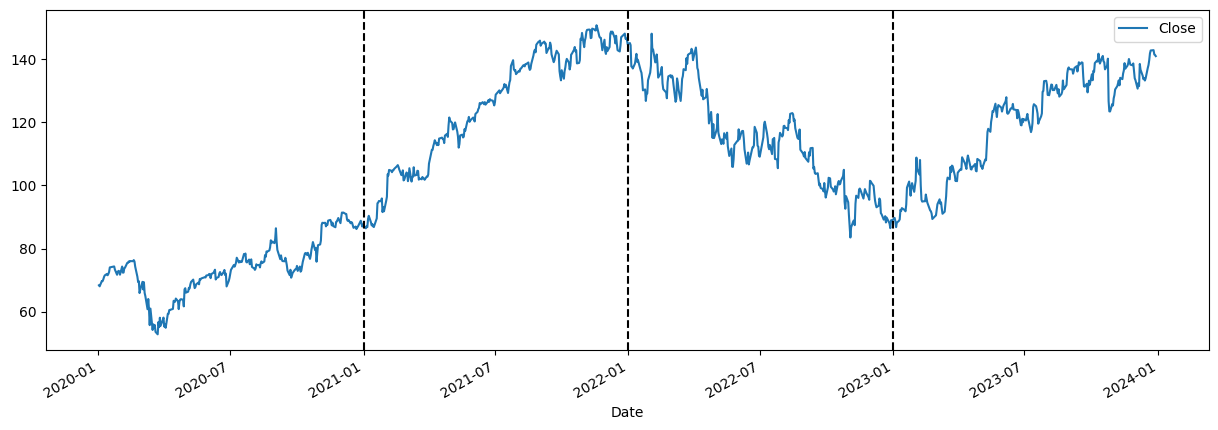

In [ ]:
# Plot the data
vlines = ['2021-01-01', '2022-01-01', '2023-01-01']

df.plot(y='Close', figsize=(15,5))

for line in vlines:
  plt.axvline(x=line, color='black', linestyle='--')

plt.show()

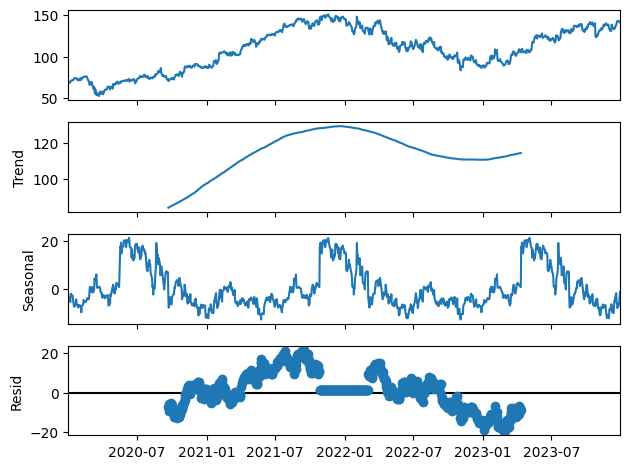

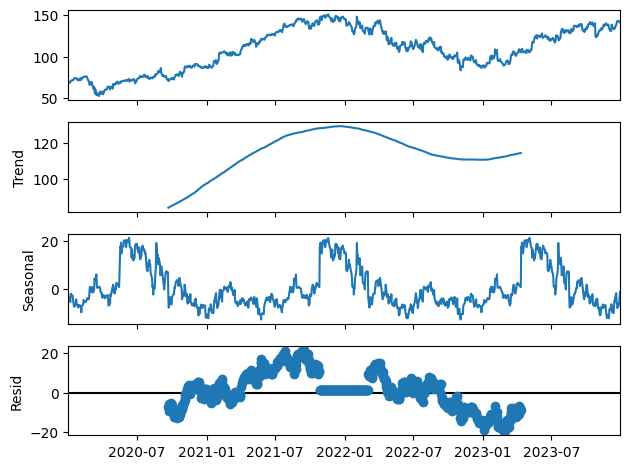

In [ ]:
# Plot the decompose item
series = df[['Close']].copy()
decompose_result_mult = seasonal_decompose(series, model="additive", period=365)


decompose_result_mult.plot()

# Traing The Model


In [ ]:
future = pd.date_range('2024-01-01', '2025-01-01', freq='D')
len(future)

367

In [ ]:
# Define the Exponential Smoothing model
model = ExponentialSmoothing(df['Close'], seasonal_periods=365, trend='add', seasonal='add').fit(optimized=1)

In [ ]:
# Fit the model
df['fitted_values'] = model.fittedvalues

df.head()

,Open,High,Low,Close,Adj Close,Volume,fitted_values
Date,,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000,68.447922
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000,67.851996
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000,68.480363
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000,69.269110
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000,72.256033


# Evaluate The Model

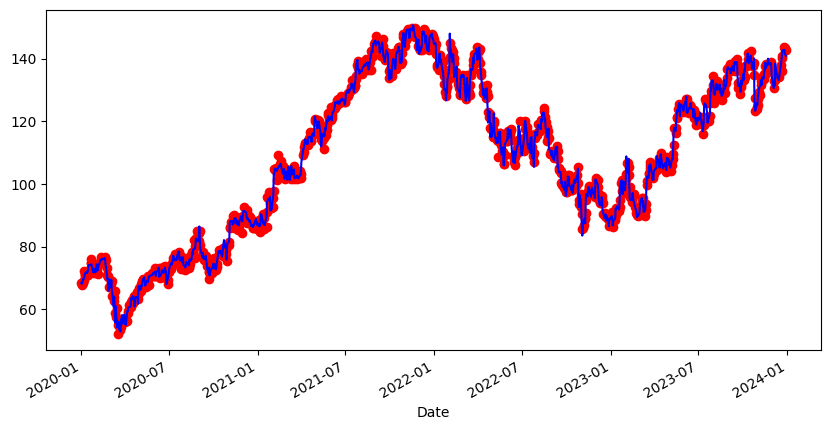

In [ ]:
# Compare fitted values and actual values

df['fitted_values'].plot(style='o', color='red')
df['Close'].plot(figsize=(10,5), color='blue')
plt.show()

In [ ]:
# Forecast 180 days
pred = model.forecast(180)
pred

1006    142.153444
1007    142.474512
1008    139.140835
1009    139.555073
1010    138.355872
           ...    
1181    165.923483
1182    167.687098
1183    168.555632
1184    168.374236
1185    167.950835
Length: 180, dtype: float64

In [ ]:
# Concat forecast and fitted values
future = pd.date_range(df.index.max(), df.index.max() + pd.DateOffset(days=179), freq='D')

forecast = pd.DataFrame({'Date': future, 'pred': pred})

# Use date column as index
forecast['Date'] = pd.to_datetime(forecast['Date'])
forecast.set_index('Date', inplace=True)

forecast

,pred
Date,
2023-12-29,142.153444
2023-12-30,142.474512
2023-12-31,139.140835
2024-01-01,139.555073
2024-01-02,138.355872
...,...
2024-06-21,165.923483
2024-06-22,167.687098
2024-06-23,168.555632


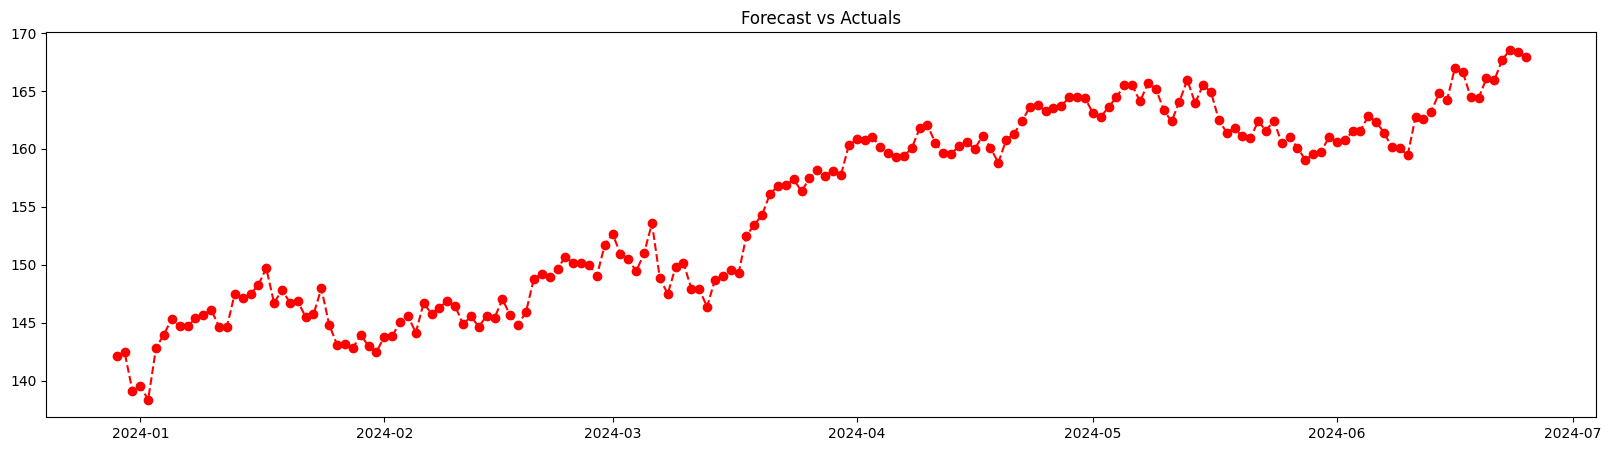

In [ ]:
# Plot prediction values

plt.figure(figsize=(20,5))
plt.title('Forecast vs Actuals')
plt.plot(forecast['pred'], '--o', color='red')

plt.show()

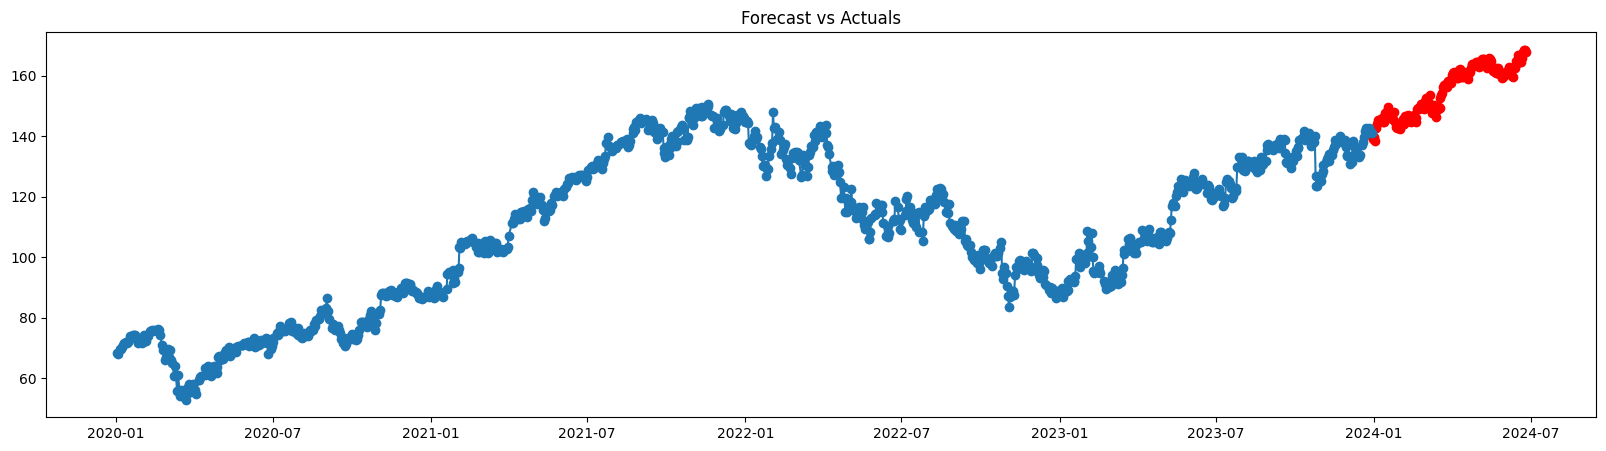

In [ ]:
# Plot both values

plt.figure(figsize=(20,5))
plt.title('Forecast vs Actuals')
plt.plot(forecast['pred'], '--o', color='red')
plt.plot(df['Close'], '-o')

plt.show()